# logistic regression is a predictive analysis.Logistic regression is used to describe data and to explain 
the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level
independent variables.

Sometimes logistic regressions are difficult to interpret; the Intellectus Statistics tool 
easily allows you to conduct the analysis, then in plain English interprets the output.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
iris = pd.read_csv('Iris Dataset.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Scatter Plot

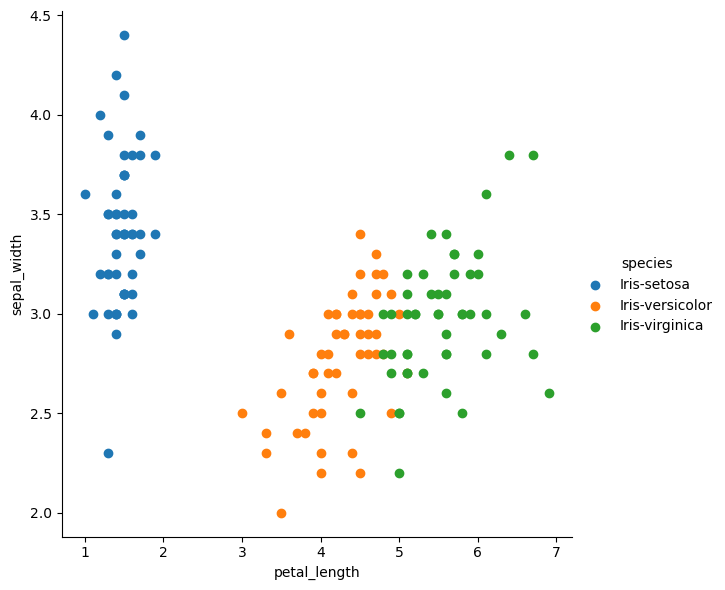

In [7]:
sns.FacetGrid(iris,hue ='species',height=6).map(plt.scatter,'petal_length','sepal_width').add_legend()

# Logistic Regression

In [8]:
#converting categorical variables into numbers

In [9]:
flower_mapping = {'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2}
iris['species'] =iris['species'].map(flower_mapping)

In [10]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Preparing inputs and outputs

In [15]:
x=iris[['sepal_length','sepal_width','petal_length','petal_width']].values
y=iris[['species']].values

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model =LogisticRegression()

In [18]:
model.fit(x,y)

LogisticRegression()

# Accuracy

In [19]:
model.score(x,y)

0.9733333333333334

# Make prediction

In [20]:
expected=y
predicted=model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [22]:
from sklearn import metrics

In [23]:
print(metrics.classification_report(expected,predicted))  #f1-score is the best accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [24]:
print(metrics.confusion_matrix(expected,predicted))
# [[50  0  0]=100%
#  [ 0 47  3]=bad
#  [ 0  1 49]]=good

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
